#Предварительный анализ

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
# Записываю в переменную data данные по Титанику из файла train
data = pd.read_csv('/content/drive/MyDrive/Работа с данными на Python/train.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Есть предположение, что те, у кого нет кого Cabin isnull являются пассажирами третьего класса

In [ ]:
data[data.Cabin.isnull()].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,687.000000,687.000000,687.000000,529.000000,687.000000,687.000000,687.000000
mean,443.208151,0.299854,2.639010,27.555293,0.547307,0.365357,19.157325
std,259.215905,0.458528,0.589602,13.472634,1.207492,0.827106,28.663343
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,214.500000,0.000000,2.000000,19.000000,0.000000,0.000000,7.877100
50%,441.000000,0.000000,3.000000,26.000000,0.000000,0.000000,10.500000
75%,664.500000,1.000000,3.000000,35.000000,1.000000,0.000000,23.000000
max,891.000000,1.000000,3.000000,74.000000,8.000000,6.000000,512.329200


In [ ]:
data[data.Cabin.notnull()].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,204.000000,204.000000,204.000000,185.000000,204.000000,204.000000,204.000000
mean,455.401961,0.666667,1.196078,35.829297,0.441176,0.436275,76.141504
std,251.379279,0.472564,0.525961,15.679356,0.628918,0.729976,74.391749
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,261.750000,0.000000,1.000000,24.000000,0.000000,0.000000,29.453125
50%,457.500000,1.000000,1.000000,36.000000,0.000000,0.000000,55.220850
75%,684.000000,1.000000,1.000000,48.000000,1.000000,1.000000,89.328150
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [ ]:
# рассмотрю пересечение классов и информации о номерах кабин
pd.crosstab(data['Pclass'], data['Cabin'].isnull())

Cabin,False,True
Pclass,,
1,176,40
2,16,168
3,12,479


Видно, что большинство пассажиров 1-го класса ехали в именованных кабинах. Большинство пассажиров 2-го и 3-го классов ехали в неименованных кабинах.

#Основной анализ

Посмотрю на данные, сгруппированные по выжившим/невыжившим

In [ ]:
data.groupby('Survived').describe().T

Survived                    0           1
PassengerId count  549.000000  342.000000
            mean   447.016393  444.368421
            std    260.640469  252.358840
            min      1.000000    2.000000
            25%    211.000000  250.750000
            50%    455.000000  439.500000
            75%    675.000000  651.500000
            max    891.000000  890.000000
Pclass      count  549.000000  342.000000
            mean     2.531876    1.950292
            std      0.735805    0.863321
            min      1.000000    1.000000
            25%      2.000000    1.000000
            50%      3.000000    2.000000
            75%      3.000000    3.000000
            max      3.000000    3.000000
Age         count  424.000000  290.000000
            mean    30.626179   28.343690
            std     14.172110   14.950952
            min      1.000000    0.420000
            25%     21.000000   19.000000
            50%     28.000000   28.000000
            75%     39.000000   36.000000
            max     74.000000   80.000000
SibSp       count  549.000000  342.000000
            mean     0.553734    0.473684
            std      1.288399    0.708688
            min      0.000000    0.000000
            25%      0.000000    0.000000
            50%      0.000000    0.000000
            75%      1.000000    1.000000
            max      8.000000    4.000000
Parch       count  549.000000  342.000000
            mean     0.329690    0.464912
            std      0.823166    0.771712
            min      0.000000    0.000000
            25%      0.000000    0.000000
            50%      0.000000    0.000000
            75%      0.000000    1.000000
            max      6.000000    5.000000
Fare        count  549.000000  342.000000
            mean    22.117887   48.395408
            std     31.388207   66.596998
            min      0.000000    0.000000
            25%      7.854200   12.475000
            50%     10.500000   26.000000
            75%     26.000000   57.000000
            max    263.000000  512.329200

###Предварительные выводы

Класс:
 - в целом, видно, что пассажиры более высокого (1,2 классов) выживали чаще.

Возраст:
 - видно, что все младенцы (до года) выжили. Их 7 человек. Наверняка, с ними выжили все родители или хотя бы один родитель. Можно выбрать фамилии. Найти их родителей (те же фамилии, Parch > 0). Вероятность их выживания будет близка к 1.

Стоимость билета:
 - средняя стоимость билета у выживших в два раза выше средней стоимости билета у невыживших.

###Гипотеза 1. Влияние класса на вероятность выживания

Уже сделав, увидел, что Вы такое проделали на занятии... Упс...

Text(0, 0.5, 'Passengers quantity')

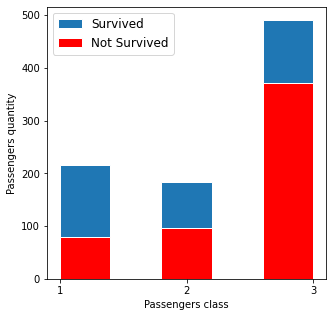

In [ ]:
ax = data['Pclass'].hist(figsize=(5, 5), bins=5, edgecolor='white')

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

data[data['Survived'] == 0]['Pclass'].hist(figsize=(5, 5), bins=5, 
                                          edgecolor='white', grid=False, color='red')
ax.legend(['Survived', 'Not Survived'], prop={'size':12})

plt.xlabel("Passengers class")

plt.ylabel("Passengers quantity")

**Вывод.**

Из приведённой гистограммы видно, что выжили:
 - порядка 2/3 пассажиров 1-го класса;
 - чуть менше 50% пассажиров 2-го класса;
 - порядка 25% пассажиров 3-го класса.

Следовательно, действительно, класс влияет на вероятность выживания.

###Гипотеза 2. Родители младенцев (до года) выжили, как и сами младенцы

In [ ]:
data[data.Age < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [ ]:
#создаю столбец, содержащий только фамилию пассажира
data['Second Name'] = [(lambda x: x.split(sep=',')[0])(name) for name in data['Name']]

In [ ]:
Babies = data[data.Age < 1]['Second Name'].values

In [ ]:
#проверяю свою гипотезу
data[data['Second Name'].str.contains('|'.join(Babies))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Second Name
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,Caldwell
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.00,0,2,250649,14.5000,NaN,S,Hamalainen
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,Allison
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,Allison
323,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.00,1,1,248738,29.0000,NaN,S,Caldwell
407,408,1,2,"Richards, Master. William Rowe",male,3.00,1,1,29106,18.7500,NaN,S,Richards
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.00,2,3,29106,18.7500,NaN,S,Richards
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.00,2,1,2666,19.2583,NaN,C,Baclini
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,Baclini
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,Allison


**Вывод.**
Работает почти для всех (кроме одной женщины с ребёнком постарше). Но слишком маленькая выборка 15 человек из 891.

###Гипотеза 3. Стоимость билета влияет на выживаемость

In [25]:
pd.qcut(data.Fare, 10).head() # разбиваю столбец Fare на 10 квантилей

0      (-0.001, 7.55]
1    (39.688, 77.958]
2       (7.854, 8.05]
3    (39.688, 77.958]
4       (7.854, 8.05]
Name: Fare, dtype: category
Categories (10, interval[float64]): [(-0.001, 7.55] < (7.55, 7.854] < (7.854, 8.05] < (8.05, 10.5] < ... <
                                     (21.679, 27.0] < (27.0, 39.688] < (39.688, 77.958] <
                                     (77.958, 512.329]]

In [29]:
data['Fare_level'] = pd.qcut(data.Fare, 10)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Children,Fare_level
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,"(-0.001, 7.55]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,"(39.688, 77.958]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,"(7.854, 8.05]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,"(39.688, 77.958]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,"(7.854, 8.05]"


In [26]:
pd.value_counts(pd.qcut(data.Fare, 10)) # в каждый квантиль попало приблизительно одинаковое\
                                        # количество пассажиров (кстати, почему не одинаковое???)

(7.854, 8.05]        106
(-0.001, 7.55]        92
(27.0, 39.688]        91
(39.688, 77.958]      89
(21.679, 27.0]        89
(14.454, 21.679]      88
(77.958, 512.329]     87
(7.55, 7.854]         87
(10.5, 14.454]        84
(8.05, 10.5]          78
Name: Fare, dtype: int64

In [30]:
surv_per_by_fare = data.groupby('Fare_level')['Survived'].mean() * 100 # подсчитываю % выживших\
surv_per_by_fare                                                       # в каждом квантиле

Fare_level
(-0.001, 7.55]       14.130435
(7.55, 7.854]        29.885057
(7.854, 8.05]        17.924528
(8.05, 10.5]         23.076923
(10.5, 14.454]       42.857143
(14.454, 21.679]     42.045455
(21.679, 27.0]       51.685393
(27.0, 39.688]       37.362637
(39.688, 77.958]     52.808989
(77.958, 512.329]    75.862069
Name: Survived, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


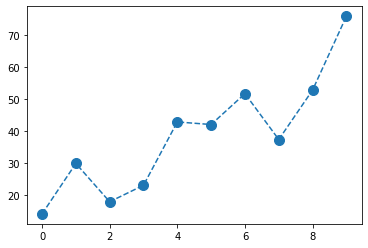

In [34]:
plt.plot(surv_per_by_fare, linestyle='--', marker='o', markersize=10)

**Вывод.**\
На приведённом графике видно, что процент выживших пассажиров растёт с увеличением стоимости билета. Так, в первом квантиле процент выживших составил менее 20%, в десятом - более 70%.\
Наверняка, этот вывод пересекается с выводом о том, что чем выше класс, тем выше процент выживаемости.

###Гипотеза 4. Старики, женщины и дети

Предполагаю, что в первую очередь спасали стариков, женщин и детей.\
Планировал разбить данные по возрастным группам. Исследовать отдельно детей (до 10 лет (можно варировать)) и стариков (более 75). Среди оставшейся группы рассмотреть пол.\
По обучающему материалу уже увидел, что старик (80 лет) всего один. И он выжил!!! ))\
Исследую детей и женщин.

In [13]:
#введу дополнительный столбец дети/не дети
#сгруппирую по нему и посмотрю на процент выживания каждой из групп
data['Children'] = (data['Age'] <= 10)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Children
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [14]:
data.groupby('Children')['Survived'].aggregate(np.mean)

Children
False    0.367594
True     0.593750
Name: Survived, dtype: float64

**Вывод.**\
Видно, что среди детей (до 10 лет) выжили 59%, среди оставшейся группы взрослых выжили 37%.

In [23]:
data_adults = data[data['Children'] == False] #сформировал выборку взрослых пассажиров
data_adults.groupby('Sex')['Survived'].aggregate(np.mean)

Sex
female    0.756184
male      0.165441
Name: Survived, dtype: float64

**Вывод.**\
Видно, что среди взрослых (предполагаю, что детей спасали вне зависимости от пола) выживших женщин почти 76%. В то время, когда выживших мужчин всего порядка 16,5%!

###Гипотеза 5. Наименование кабины (или его отсутствие) vs выживаемость

In [54]:
data['Named_Cabin'] = data.Cabin.isnull()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Children,Fare_level,Named_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,"(-0.001, 7.55]",True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,"(39.688, 77.958]",False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,"(7.854, 8.05]",True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,"(39.688, 77.958]",False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,"(7.854, 8.05]",True


In [55]:
data['Named_Cabin'].replace({True: 'Nonamed',
                             False: 'Named'},
                            inplace=True)

Text(0, 0.5, 'Passengers quantity')

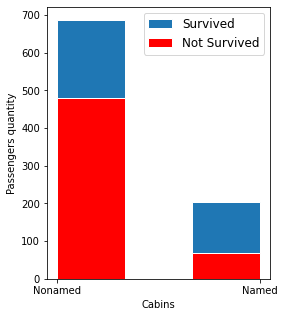

In [58]:
ax = data['Named_Cabin'].hist(figsize=(4, 5), bins=3, grid=False, edgecolor='white')

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

data[data['Survived'] == 0]['Named_Cabin'].hist(figsize=(4, 5), bins=3, 
                                          edgecolor='white', grid=False, color='red')
ax.legend(['Survived', 'Not Survived'], prop={'size':12})

plt.xlabel("Cabins")

plt.ylabel("Passengers quantity")

**Вывод.**\
Видно, что из тех, у кого кабины были поименованы, выжили существенно более половины пассажиров.\
У кого кабины не были поименованы (полагаю, что располагались на средних и нижних палубах, с которых труднее было выбраться), выжили существенно менее половины пассажиров.